<a href="https://colab.research.google.com/github/saltatt/Fundamentals-of-Data-Mining-and-Machine-Learning/blob/main/HW1_Regression_with_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [ ]:
print("чтобы каждый раз при рандом выборе вывод были одинаковые числа, фиксируем")

чтобы каждый раз при рандом выборе вывод были одинаковые числа, фиксируем


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [ ]:
# your code here
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [ ]:
# your code here
df_test.head(5)
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [ ]:
# your code here
df_train.describe(include='object')
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [ ]:
# your code here
df_train.isna().sum()
df_test.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [ ]:
# your code here
df_train.drop(columns=['fuel',	'seller_type',	'transmission',	'owner'])
df_train.duplicated().sum()

np.int64(985)

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [ ]:
# your code here
df_train[df_train.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0



(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [ ]:
# your code here
df_train = df_train.drop_duplicates()

In [ ]:
df_train.shape

(6014, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [ ]:
# your code here
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [ ]:
df_train = df_train.astype({
    "mileage": str,
    "engine": str,
    "max_power": str,
    "torque": str
})

df_test = df_test.astype({
    "mileage": str,
    "engine": str,
    "max_power": str,
    "torque": str
})


In [ ]:
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].str.extract(r'(\d+\.?\d*)').astype(float)

df_train['torque_val'] = df_train['torque'].str.extract(r'(\d+\.?\d*)').astype(float)
df_train['max_torque_rpm'] = df_train['torque'].str.extract(r'@ *(\d+)').astype(float)

df_train = df_train.drop(columns=['torque'])
for col in ['mileage', 'engine', 'max_power']:
    df_test[col] = df_test[col].str.extract(r'(\d+\.?\d*)').astype(float)

df_test['torque_val'] = df_test['torque'].str.extract(r'(\d+\.?\d*)').astype(float)
df_test['max_torque_rpm'] = df_test['torque'].str.extract(r'@ *(\d+)').astype(float)

df_test = df_test.drop(columns=['torque'])

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [ ]:
# your code here
df_train.fillna(df_train.median(numeric_only=True), inplace=True)
df_test.fillna(df_train.median(numeric_only=True), inplace=True)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [ ]:
print("потому что кол-во сидений это как тип машины и не требует математические решения: найти медиану и т.д это бесмыленно")

потому что кол-во сидений это как тип машины и не требует математические решения: найти медиану и т.д это бесмыленно


In [ ]:
# your code here
df_train = df_train.astype({
    "engine": "int",
    "seats": "int"
})
df_test = df_test.astype({
    "engine": "int",
    "seats": "int"
})

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

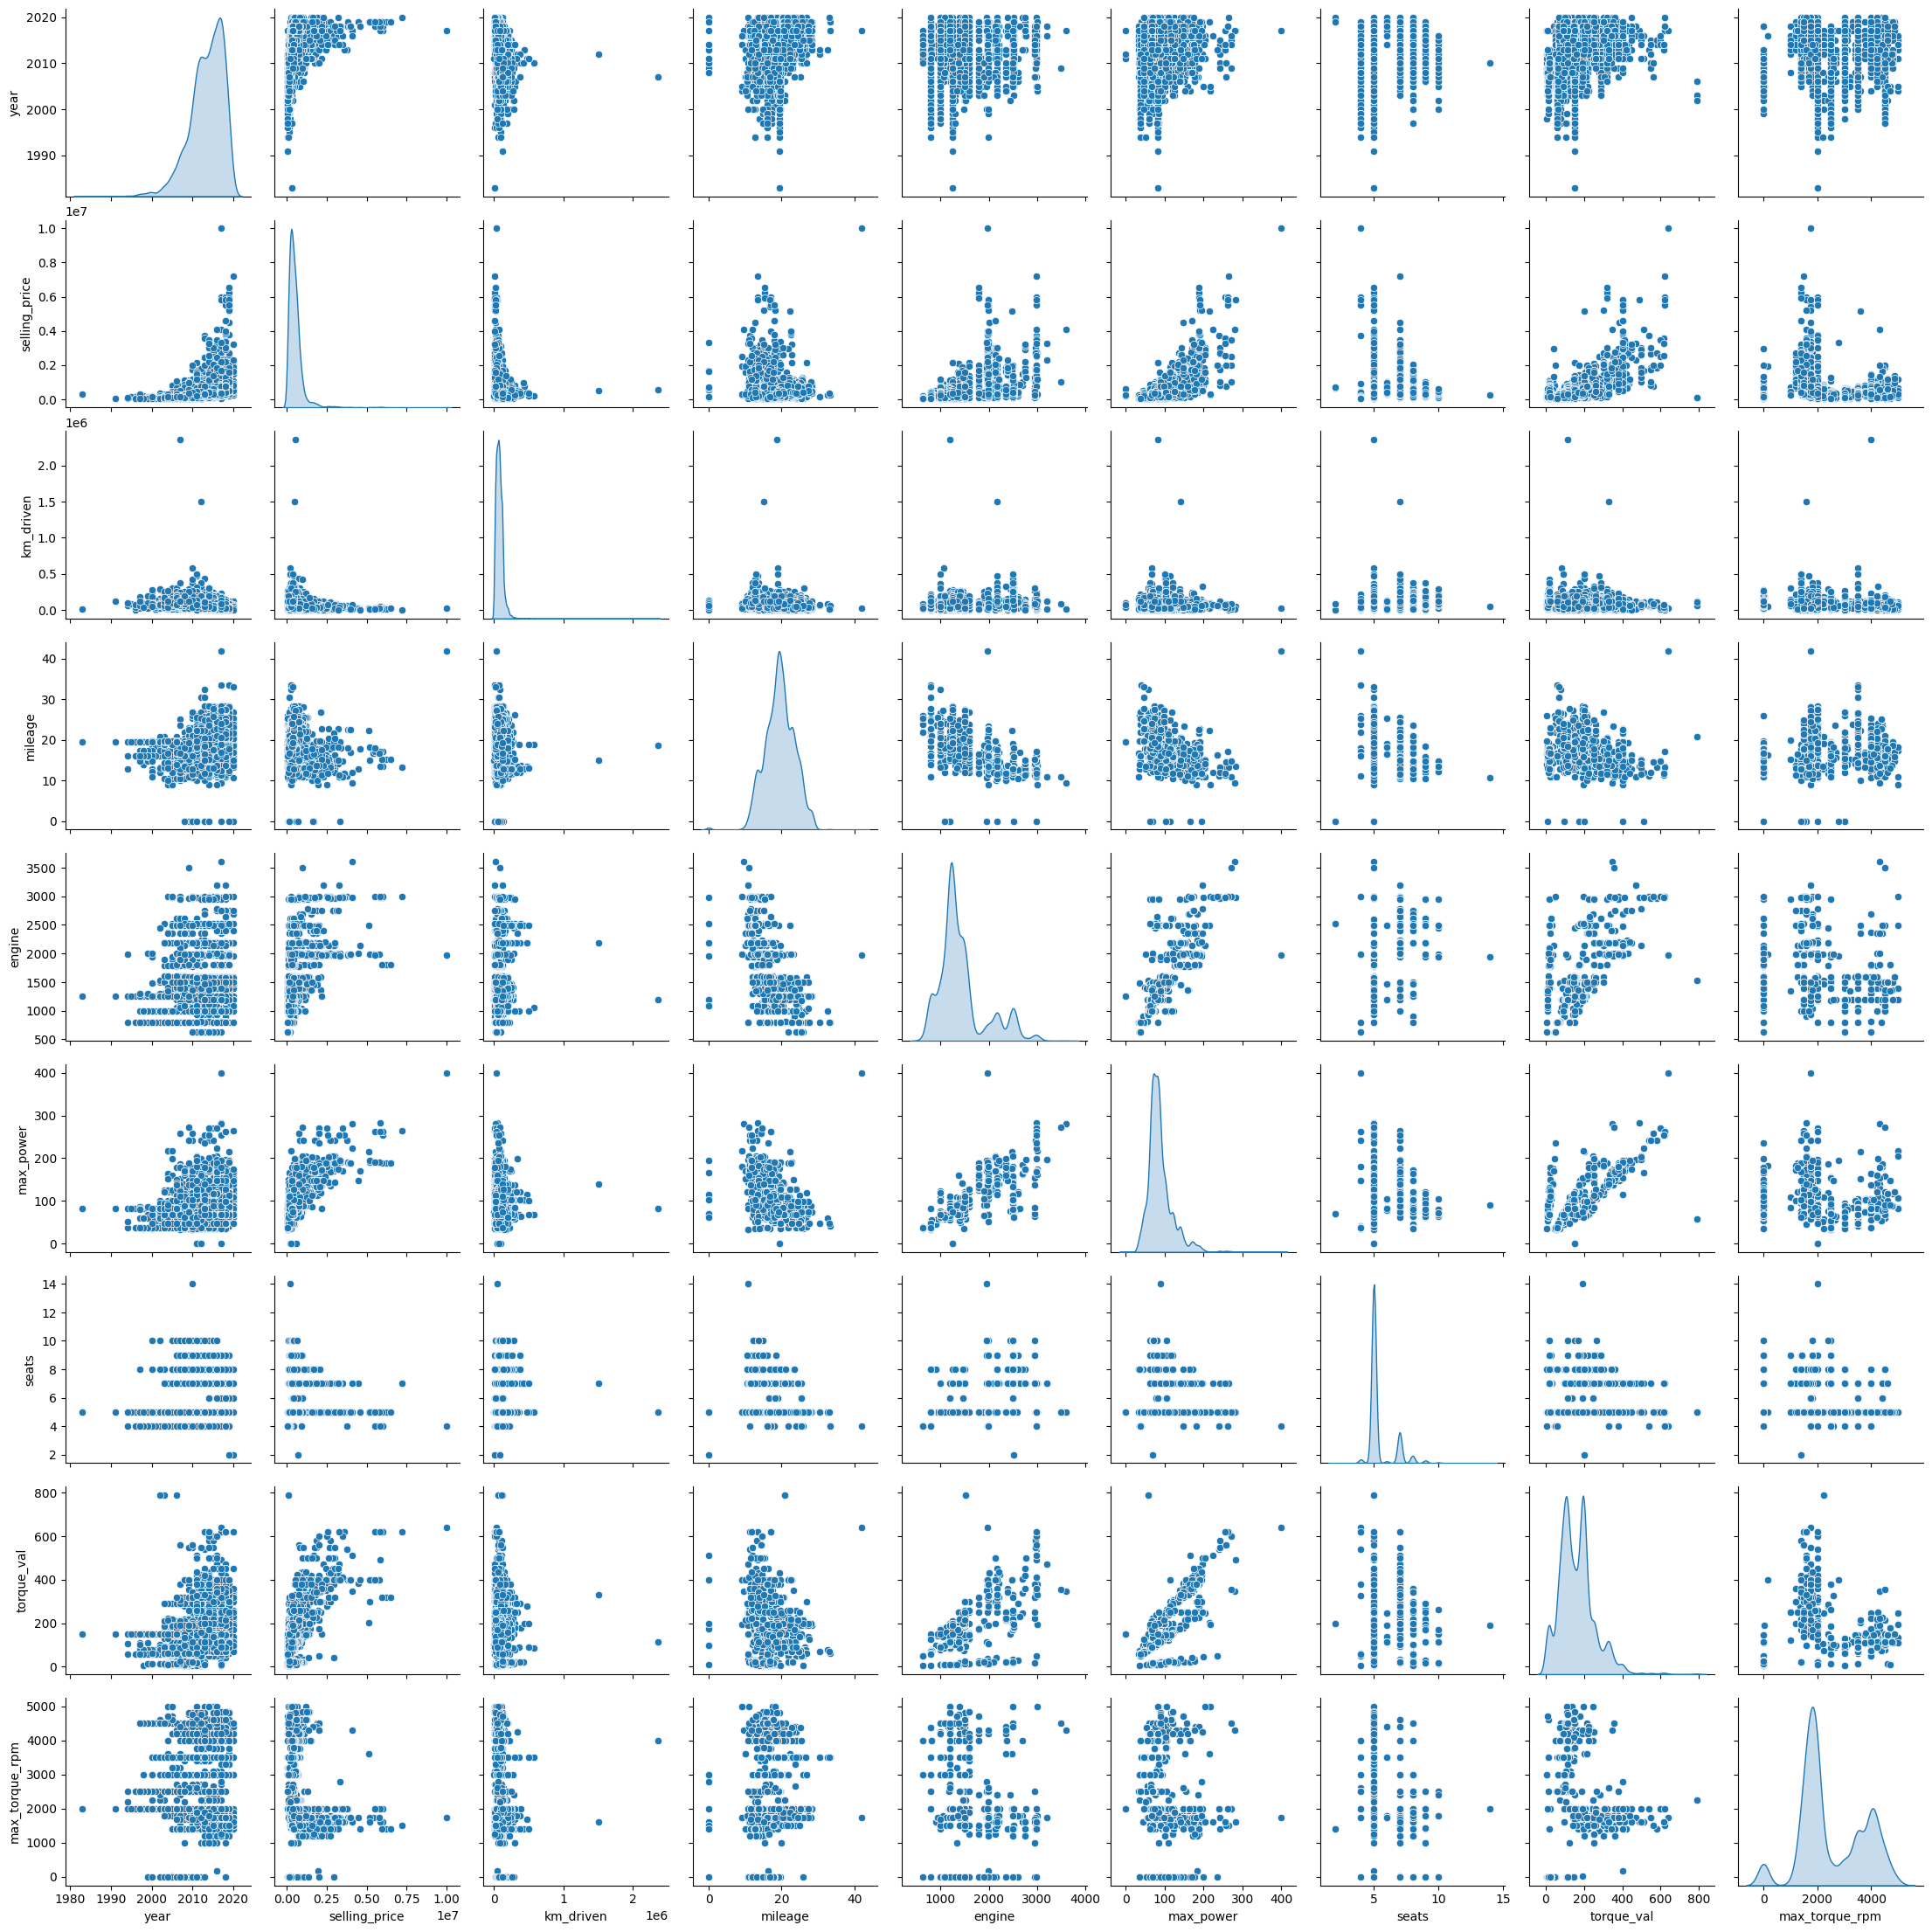

In [ ]:
# your code here
numeric_cols = df_train.select_dtypes(include="number").columns
sns.pairplot(df_train[numeric_cols],diag_kind="kde")
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

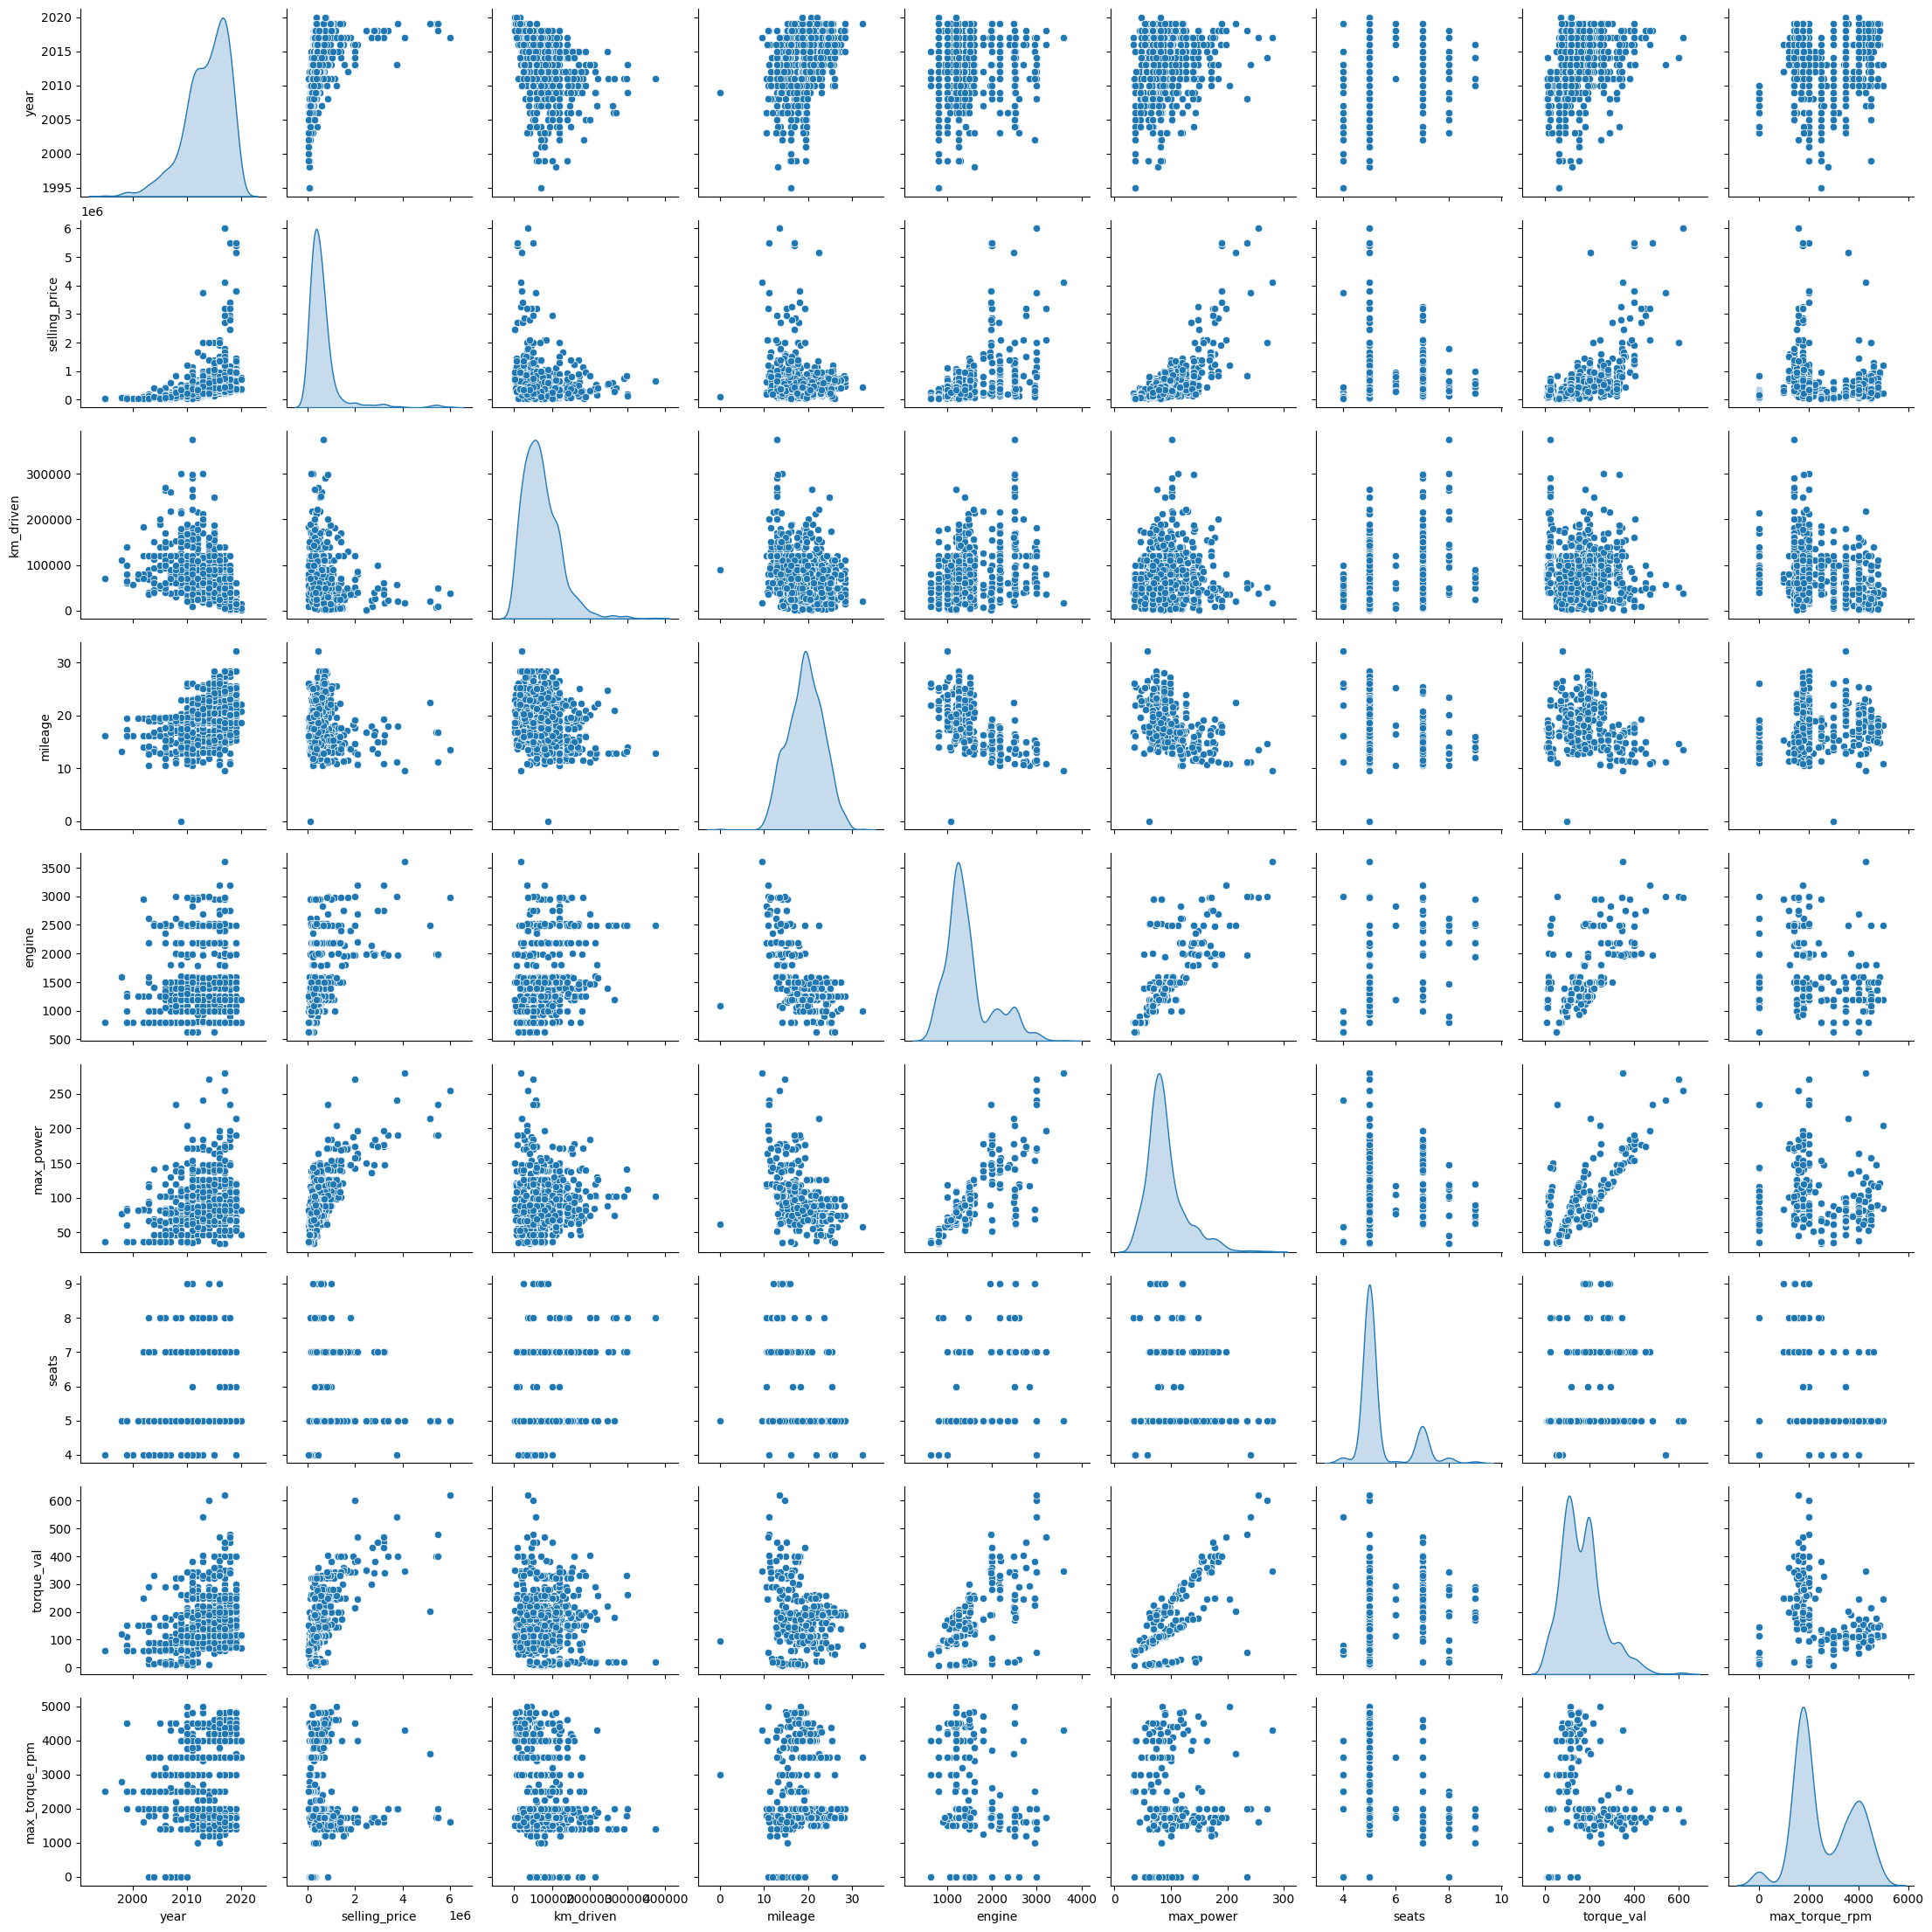

Похожими оказались


In [ ]:
# your code here
sns.pairplot(df_test[numeric_cols], diag_kind='kde')
plt.show()
print('Похожими оказались')

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

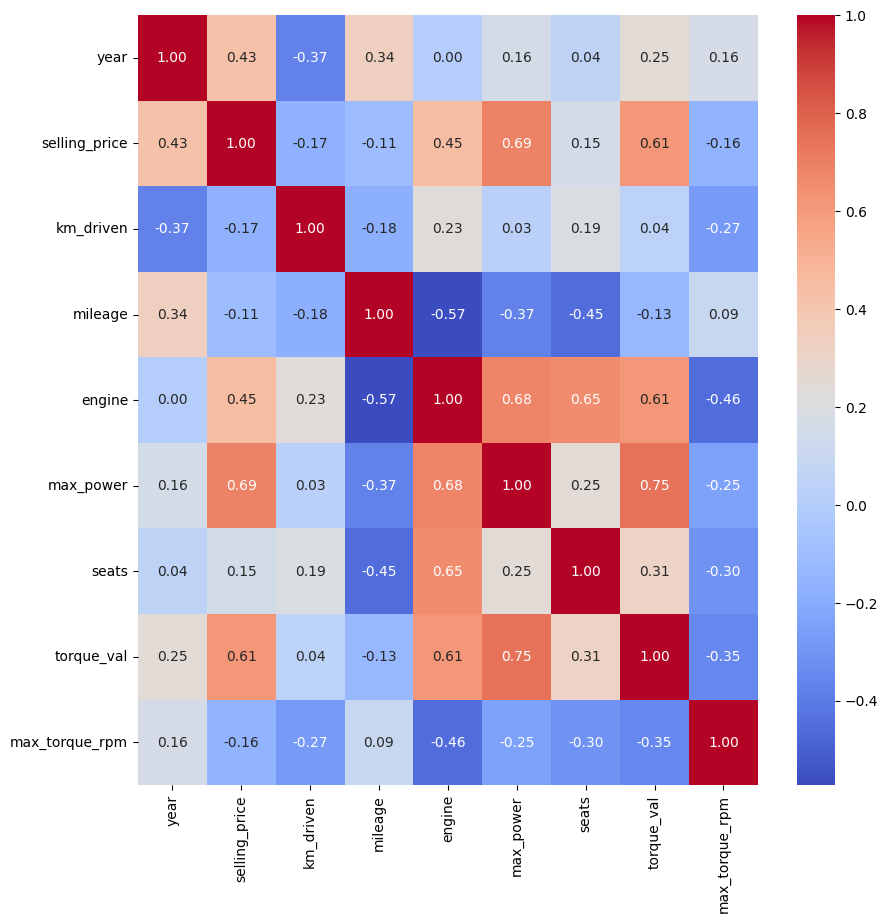

In [ ]:
# your code here
plt.figure(figsize=(10,10))
sns.heatmap(df_train[numeric_cols].corr(), annot=True, fmt= ".2f", cmap = 'coolwarm')
plt.show()

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [ ]:
print("1) year and engine , year and seats \n2)max_power, torque_val \n3)yes ")

1) year and engine , year and seats 
2)max_power, torque_val 
3)yes 


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

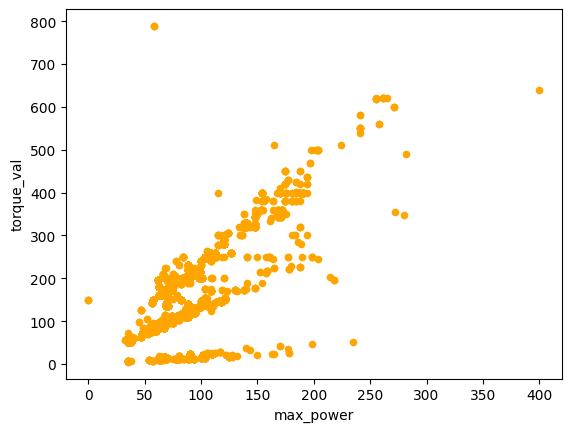

In [ ]:
# your code here
df_train.plot.scatter(x='max_power',y='torque_val', c='orange')
plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [ ]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(include=['number']).drop(columns=['selling_price'])

In [ ]:
X_train.head()

,year,km_driven,mileage,engine,max_power,seats,torque_val,max_torque_rpm
0,2014,145500,23.40,1248,74.00,5,190.00,2000.0
1,2014,120000,21.14,1498,103.52,5,250.00,1500.0
2,2010,127000,23.00,1396,90.00,5,22.40,2000.0
3,2007,120000,16.10,1298,88.20,5,11.50,4.0
4,2017,45000,20.14,1197,81.86,5,113.75,4000.0


In [ ]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(include=['number']).drop(columns=['selling_price'])

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.model_selection import train_test_split
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Train: R² = {r2_train:.4f}, MSE = {mse_train:.4f}")
print(f"Test : R² = {r2_test:.4f}, MSE = {mse_test:.4f}")

Train: R² = 0.5989, MSE = 114293598823.9272
Test : R² = 0.5986, MSE = 230720782305.3463


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# your code here

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [ ]:
# your code here

\(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lasso = Pipeline([
    ("model", Lasso(random_state=42))
])

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print(f"Lasso: R² = {r2_score(y_test, y_pred):.4f}, MSE = {MSE(y_test, y_pred):.4f}")


Lasso: R² = 0.5986, MSE = 230721271875.7686


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [ ]:
# your code here


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"model__alpha": np.logspace(-3, 2, 50)}

grid_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=10,
    scoring="r2",
    n_jobs=-1
)

grid_lasso.fit(X_train, y_train)

print("best alpha for Lasso:", grid_lasso.best_params_)
print("best R² (train):", grid_lasso.best_score_)
print("R² (test):", r2_score(y_test, grid_lasso.predict(X_test)))

best alpha for Lasso: {'model__alpha': np.float64(100.0)}
best R² (train): 0.5759631491613313
R² (test): 0.5985076835338424


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [ ]:
# your code here


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = Pipeline([
    ("model", ElasticNet(random_state=42))
])

param_grid = {
    "model__alpha": np.logspace(-3, 2, 20),
    "model__l1_ratio": np.linspace(0, 1, 10)
}
grid_elastic = GridSearchCV(
    estimator=elastic,
    param_grid=param_grid,
    cv=10,
    scoring="r2",
    n_jobs=-1
)

grid_elastic.fit(X_train, y_train)

print("best parametres ElasticNet:", grid_elastic.best_params_)
print("best R² (train):", grid_elastic.best_score_)
print("R² (test):", r2_score(y_test, grid_elastic.predict(X_test)))


best parametres ElasticNet: {'model__alpha': np.float64(0.001), 'model__l1_ratio': np.float64(1.0)}
best R² (train): 0.5758985335194213
R² (test): 0.5986267901726692


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [ ]:
# your code here

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [ ]:
# your code here
X_train_cat = df_train.drop(columns=['selling_price', 'name'])
X_train_cat.describe(include='object')


,fuel,seller_type,transmission,owner
count,6014,6014,6014,6014
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3269,5394,5505,3721


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded = encoder.fit_transform(df_train[["seats"]])
X_encoded = np.hstack([df_train.drop(columns=["seats"]).values, encoded])

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

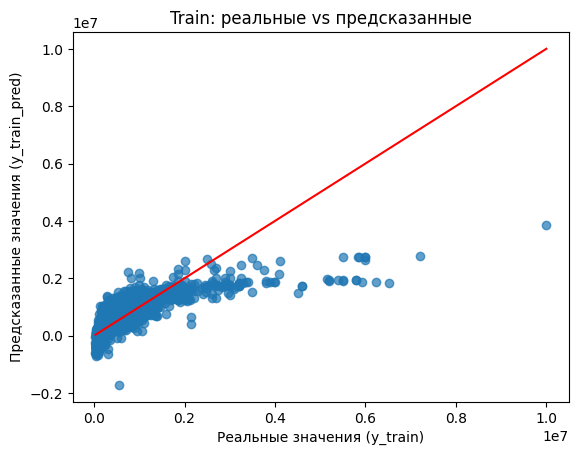

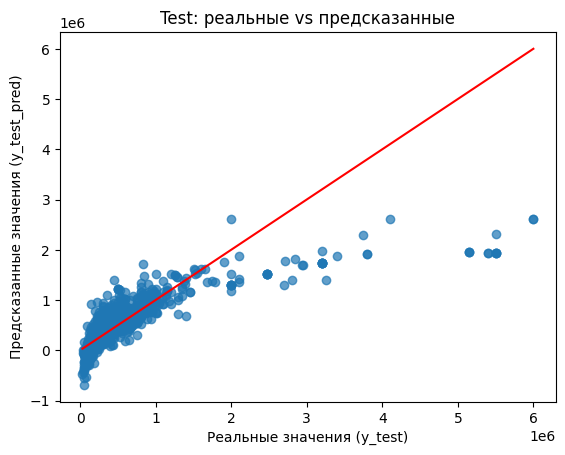

In [ ]:
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color="red")
plt.xlabel("Реальные значения (y_train)")
plt.ylabel("Предсказанные значения (y_train_pred)")
plt.title("Train: реальные vs предсказанные")
plt.show()

plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.xlabel("Реальные значения (y_test)")
plt.ylabel("Предсказанные значения (y_test_pred)")
plt.title("Test: реальные vs предсказанные")
plt.show()

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer

ridge = Pipeline([
    ("model", Ridge(random_state=42))
])

param_grid = {"model__alpha": np.logspace(-3, 2, 50)}

grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=10,
    scoring="r2",
    n_jobs=-1
)

grid_ridge.fit(X_train, y_train)

print("Лучший alpha для Ridge:", grid_ridge.best_params_)
print("Лучшая R² (train):", grid_ridge.best_score_)
print("R² (test):", r2_score(y_test, grid_ridge.predict(X_test)))


Лучший alpha для Ridge: {'model__alpha': np.float64(0.001)}
Лучшая R² (train): 0.5758985332174807
R² (test): 0.5986267889041741


# Часть 4 - бонусная (2 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here
import datetime
df = pd.DataFrame({
    "year": [2010, 2015, 2018, 2020, 2012],
    "mileage": [150000, 80000, 50000, 20000, 120000],
    "engine_power": [120, 150, 200, 250, 100],
    "engine_volume": [1.6, 2.0, 2.5, 3.0, 1.4],
    "owner": [2, 1, 1, 2, 3],
    "price": [400000, 700000, 900000, 1200000, 350000]
})
df["power_per_litre"] = df["engine_power"] / df["engine_volume"]
current_year = datetime.datetime.now().year
df["car_age"] = current_year - df["year"]
df["mileage_per_year"] = df["mileage"] / df["car_age"]
df["year_squared"] = df["year"]**2
df["owner_3plus"] = (df["owner"] >= 3).astype(int)
df["is_new"] = (df["car_age"] < 3).astype(int)
df["engine_volume_filled"] = df["engine_volume"].fillna(df["engine_volume"].median())
df["engine_volume_missing"] = df["engine_volume"].isna().astype(int)
for col in ["mileage", "engine_power", "price"]:
    low, high = df[col].quantile([0.01, 0.99])
    df[col] = df[col].clip(low, high)
df["log_price"] = np.log1p(df["price"])
df

,year,mileage,engine_power,engine_volume,owner,price,power_per_litre,car_age,mileage_per_year,year_squared,owner_3plus,is_new,engine_volume_filled,engine_volume_missing,log_price
0,2010,148800,120.0,1.6,2,400000,75.000000,15,10000.000000,4040100,0,0,1.6,0,12.899222
1,2015,80000,150.0,2.0,1,700000,75.000000,10,8000.000000,4060225,0,0,2.0,0,13.458837
2,2018,50000,200.0,2.5,1,900000,80.000000,7,7142.857143,4072324,0,0,2.5,0,13.710151
3,2020,21200,248.0,3.0,2,1188000,83.333333,5,4000.000000,4080400,0,0,3.0,0,13.987783
4,2012,120000,100.8,1.4,3,352000,71.428571,13,9230.769231,4048144,1,0,1.4,0,12.771389


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [ ]:
def business_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    rel_error = np.abs(y_pred - y_true) / y_true

    return np.mean(rel_error <= 0.10)

y_true = [100, 200, 300, 400, 500]
y_pred = [105, 180, 330, 390, 600]

print(business_metrics(y_true, y_pred))

0.8
